# Task 6 : Prediction Using Decision Tree Algorithm

 # Created by : Dief Mohamed
 
 **used Tool : ML With Python**
 
 Dataset : ["https://bit.ly/3kXTdox"]

In [28]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

%matplotlib inline 

In [29]:
df = pd.read_csv("Iris.csv" , index_col=0 )
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df.shape

(150, 5)

In [31]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [32]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [33]:
df.describe(include = "all")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [35]:
X = df.iloc[:, :-1].values #features 
y = df.iloc[:, -1].values #target

In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [37]:
X_train

array([[6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [5.2, 2.7, 3.9, 1.4],
       [5.7, 3.8, 1.7, 0.3],
       [6. , 2.7, 5.1, 1.6],
       [5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2

In [38]:
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [39]:
 #Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [40]:
X_train

array([[ 0.61303014,  0.10850105,  0.94751783,  0.73603967],
       [-0.56776627, -0.12400121,  0.38491447,  0.34808318],
       [-0.80392556,  1.03851009, -1.30289562, -1.3330616 ],
       [ 0.25879121, -0.12400121,  0.60995581,  0.73603967],
       [ 0.61303014, -0.58900572,  1.00377816,  1.25331499],
       [-0.80392556, -0.82150798,  0.04735245,  0.21876435],
       [-0.21352735,  1.73601687, -1.19037495, -1.20374277],
       [ 0.14071157, -0.82150798,  0.72247648,  0.47740201],
       [ 0.02263193, -0.12400121,  0.21613346,  0.34808318],
       [-0.09544771, -1.05401024,  0.10361279, -0.03987331],
       [ 1.0853487 , -0.12400121,  0.94751783,  1.12399616],
       [-1.39432376,  0.34100331, -1.41541629, -1.3330616 ],
       [ 1.20342834,  0.10850105,  0.72247648,  1.38263382],
       [-1.04008484,  1.03851009, -1.24663528, -0.81578628],
       [-0.56776627,  1.50351461, -1.30289562, -1.3330616 ],
       [-1.04008484, -2.4490238 , -0.1776889 , -0.29851096],
       [ 0.73110978, -0.

In [41]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=10, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [42]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [43]:
y_pred


array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [45]:
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import accuracy_score 
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import  confusion_matrix

cm=np.array(confusion_matrix(y_test,y_pred))

cm

Accuracy: 1.0


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [48]:
# for visualziing the Decision Tree
feature = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
classes = ['setosa','versicolor','virginica']

[Text(418.5, 747.4499999999999, 'petal width (cm) <= -0.557\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]\nclass = virginica'),
 Text(354.11538461538464, 611.55, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(482.8846153846154, 611.55, 'petal width (cm) <= 0.671\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]\nclass = virginica'),
 Text(257.53846153846155, 475.65, 'petal length (cm) <= 0.638\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor'),
 Text(128.76923076923077, 339.74999999999994, 'petal width (cm) <= 0.542\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]\nclass = versicolor'),
 Text(64.38461538461539, 203.8499999999999, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(193.15384615384616, 203.8499999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(386.3076923076923, 339.74999999999994, 'petal width (cm) <= 0.413\nentropy = 0.971\nsamples = 5\nvalue = [0, 

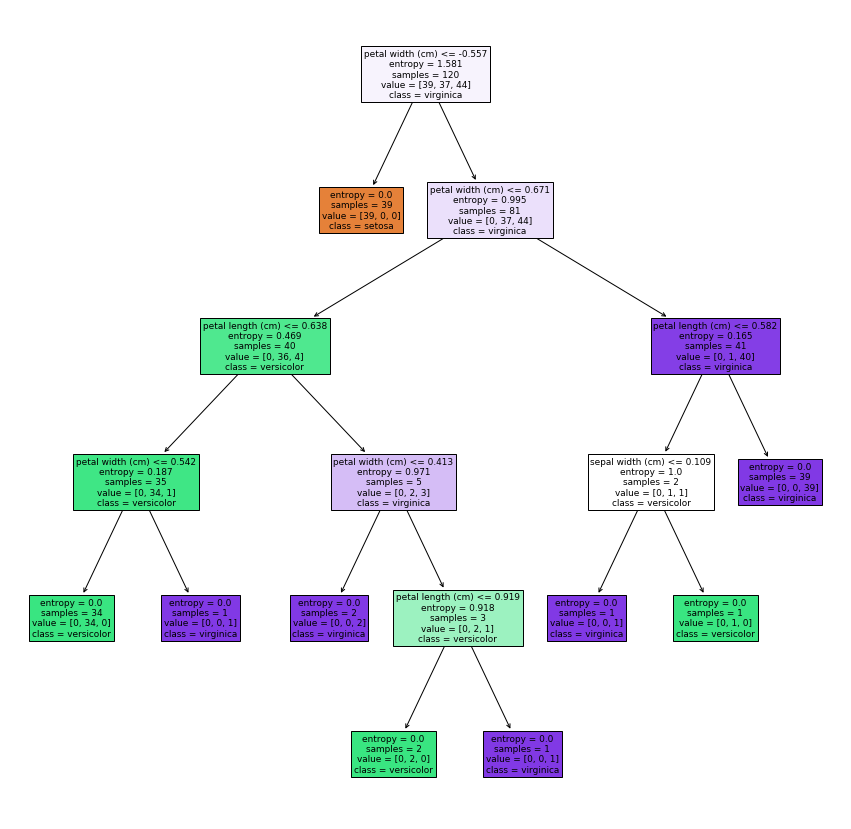

In [49]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(classifier, feature_names = feature, class_names = classes, filled = True)

lets use some samples of input data and show the output of the prediction model. 

In [50]:
input_data=(5.0,3.4,1.6,2.2)

 #changing the input data to a numpy array 
input_data_as_nparray = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance 
input_data_reshaped = input_data_as_nparray.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print("The category is",prediction) 

The category is ['Iris-virginica']


In [51]:
input_data=(5. , 3.5, 1.6, 0.6)

 #changing the input data to a numpy array 
input_data_as_nparray = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance 
input_data_reshaped = input_data_as_nparray.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print("The category is",prediction) 

The category is ['Iris-virginica']


In [52]:
input_data=(5.9, 1.6, 2.3, 4.4)

 #changing the input data to a numpy array 
input_data_as_nparray = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance 
input_data_reshaped = input_data_as_nparray.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print("The category is",prediction) 

The category is ['Iris-virginica']
